<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [80]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [81]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [82]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [83]:
print(netflix_df["release_year"].unique())

[2016 2011 2009 2008 2019 1997 2017 2018 2014 2020 2015 2010 2005 2012
 2006 2013 2000 1989 2004 1977 1971 1993 2007 1998 1988 1996 2002 1986
 1990 1979 1980 1974 2001 1999 1966 1991 1982 1994 2003 1995 1978 1992
 1972 1975 1973 1967 1960 1981 1958 1976 2021 1968 1956 1985 1965 1984
 1983 1987 1945 1946 1962 1969 1955 1963 1964 1942 1954 1970 1947 1944
 1959]


In [84]:
# filter data to keep only movies
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]
print(netflix_subset)

     show_id  ...          genre
0         s2  ...         Dramas
1         s3  ...  Horror Movies
2         s4  ...         Action
3         s5  ...         Dramas
5         s7  ...  Horror Movies
...      ...  ...            ...
4807   s7779  ...       Comedies
4808   s7781  ...         Dramas
4809   s7782  ...       Children
4810   s7783  ...         Dramas
4811   s7784  ...         Dramas

[4677 rows x 11 columns]


In [85]:
# Filter to keep only movies released in the 1990s
# Start by filtering out movies that were released before 1990
subset = netflix_subset[(netflix_subset["release_year"] > 1990)]

# And then do the same to filter out movies released on or after 2000
movies_1990s = subset[(subset["release_year"]<2000)]
print(movies_1990s.head())

    show_id   type  ...                                        description     genre
6        s8  Movie  ...  After one of his high school students attacks ...    Dramas
118    s167  Movie  ...  At the center of this engrossing melodrama is ...    Dramas
145    s211  Movie  ...  After a run-in with Richard Grieco, dimwits Do...  Comedies
167    s239  Movie  ...  When a philandering club promoter sets out to ...  Comedies
194    s274  Movie  ...  Raised by a kindly thief, orphaned Jimmy goes ...    Dramas

[5 rows x 11 columns]


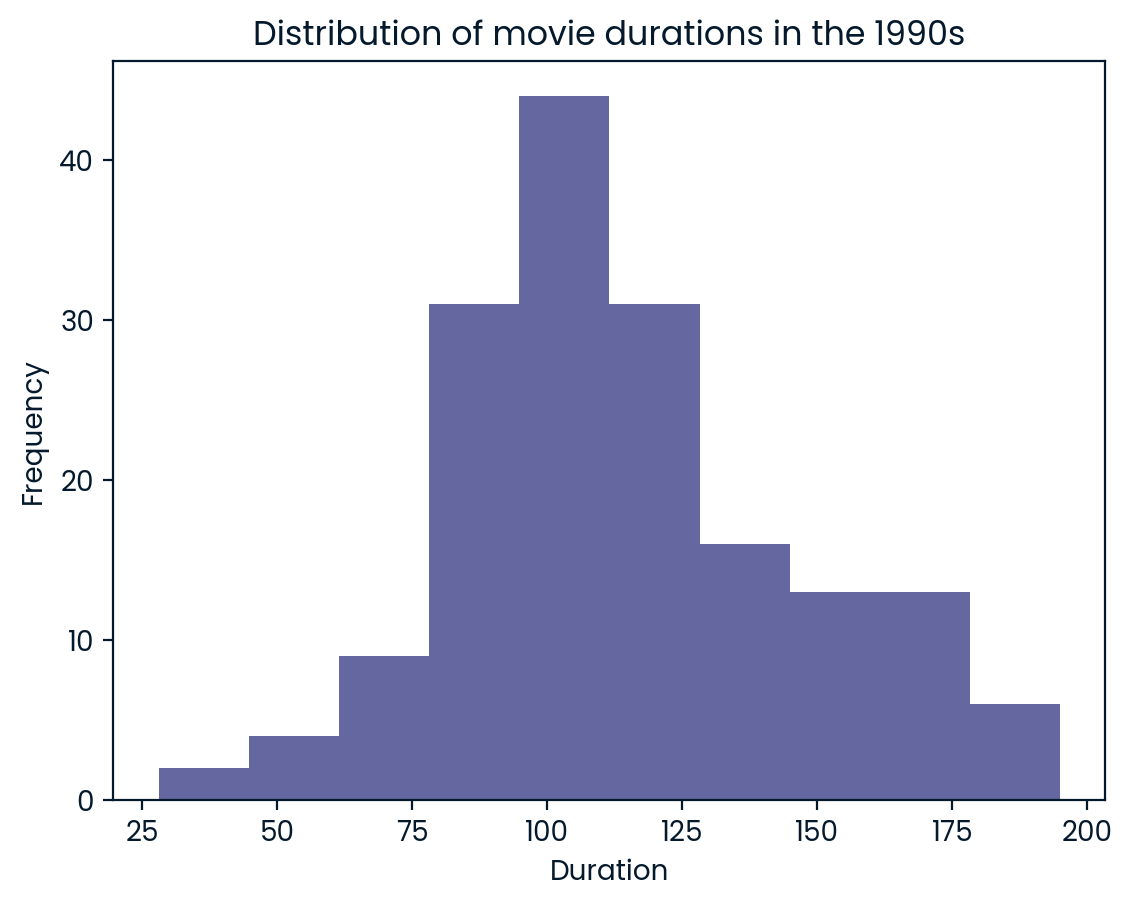

In [86]:
# visuliza movies duration 1990
plt.hist(movies_1990s["duration"])
plt.title("Distribution of movie durations in the 1990s")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()
duration = 100

In [87]:
most_common_duration = movies_1990s["duration"].mode()[0]
print(f"The most common duration is: {most_common_duration} minutes")

The most common duration is: 94 minutes


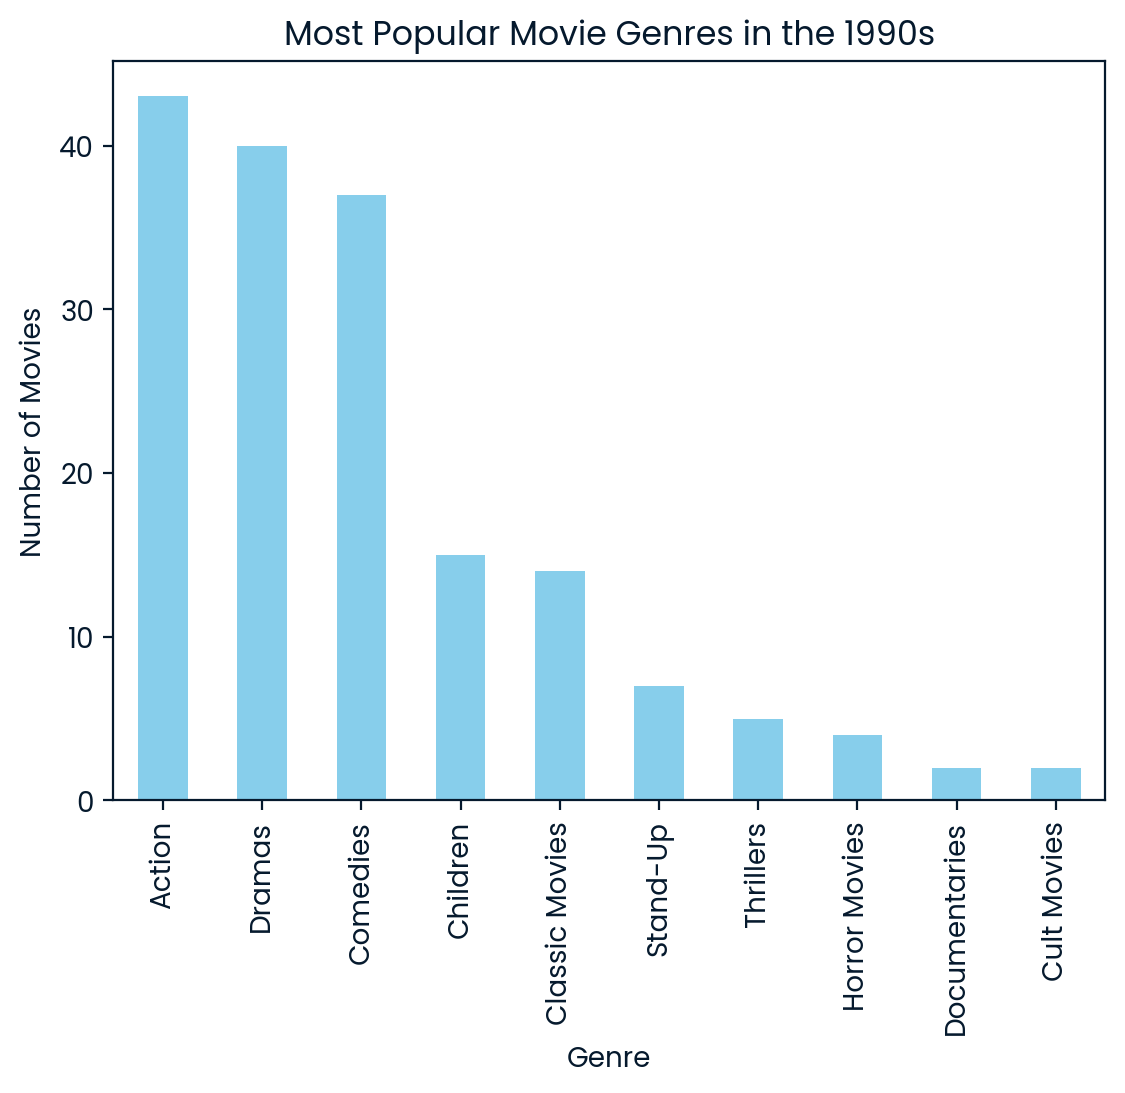

In [88]:
# Count the number of movies in each genre
genre_counts = movies_1990s['genre'].value_counts()

# Plot the top genres
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Most Popular Movie Genres in the 1990s')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

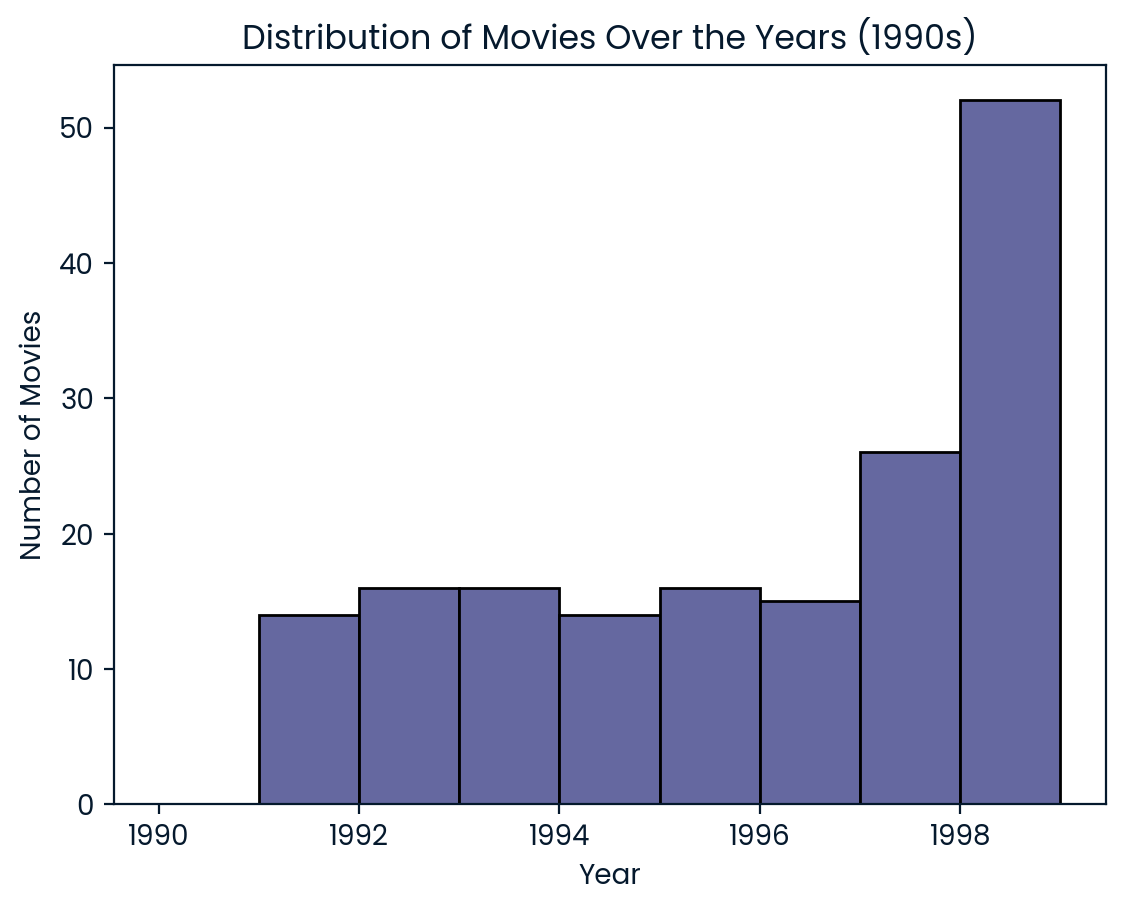

In [89]:
# Visualize the distribution of movies over the years in the 1990s
plt.hist(movies_1990s['release_year'], bins=range(1990, 2000), edgecolor='black')
plt.title('Distribution of Movies Over the Years (1990s)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [90]:
# Count the number of short action movies (duration < 90)
short_movie_count = (action_movies_1990s['duration'] < 90).sum()

print(short_movie_count)

7


In [91]:
# Iterate over the labels and rows of the DataFrame and check if the duration is less than 90, if it is, add 1 to the counter, if it isn't, the counter should remain the same
for label, row in action_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print(short_movie_count)

14


In [92]:
(action_movies_1990s["duration"] < 90).sum()

7

In [93]:
# Subset the DataFrame for type "Movie"
netflix_movies = netflix_df[netflix_df["type"] == "Movie"]

# Filter for movies released in the 1990s
movies_1990s = netflix_movies[(netflix_movies["release_year"] >= 1990) & (netflix_movies["release_year"] < 2000)]

# Filter for "Action" genre
action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]

# Count movies with duration < 90 minutes
short_movie_count = (action_movies_1990s["duration"] < 90).sum()

print(short_movie_count)


7
